In [3]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!tar xf /content/drive/MyDrive/Big_data/spark-3.1.1-bin-hadoop3.2.tgz

In [4]:
!pip install pyspark==3.1.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.3/212.3 MB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 22.4 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.1.1-py2.py3-none-any.whl size=212767583 sha256=b89b7ac405ffdacb1b74ae4e46e711bf6bf997b047930e914dc95cd4b2fff37d
  Stored in directory: /root/.cache/pip/wheels/a0/3f/72/8efd988f9ae041f051c75e6834cd92dd6d13a726e206e8b6f3
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7


In [1]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

In [5]:
from pyspark.sql import SparkSession

# Task 2

In [6]:
ss = SparkSession.builder\
  .appName('Task 2')\
  .getOrCreate()

In [13]:
path = '/content/drive/MyDrive/Big_data/baskets.csv'
df = ss.read.csv(path, header=True)

In [16]:
from pyspark.sql import functions as f

df = df.withColumn('year', f.col('year').cast('int'))
df = df.withColumn('month', f.col('month').cast('int'))
df = df.withColumn('day', f.col('day').cast('int'))

new_df = df.select('*').groupBy('Member_number', 'Date', 'year', 'month', 'day')\
  .agg(f.concat_ws(',',f.collect_set('itemDescription')).alias('basket'))
sort_df = new_df.sort("year", "month", "day", ascending=True)
sort_df.show()

+-------------+----------+----+-----+---+--------------------+
|Member_number|      Date|year|month|day|              basket|
+-------------+----------+----+-----+---+--------------------+
|         2351|01/01/2014|2014|    1|  1|shopping bags,cle...|
|         1659|01/01/2014|2014|    1|  1|specialty chocola...|
|         2610|01/01/2014|2014|    1|  1|domestic eggs,bot...|
|         1789|01/01/2014|2014|    1|  1|candles,hamburger...|
|         2727|01/01/2014|2014|    1|  1|hamburger meat,fr...|
|         4260|01/01/2014|2014|    1|  1|    soda,brown bread|
|         2542|01/01/2014|2014|    1|  1|bottled water,sli...|
|         3956|01/01/2014|2014|    1|  1|yogurt,shopping b...|
|         2974|01/01/2014|2014|    1|  1|bottled water,ber...|
|         4942|01/01/2014|2014|    1|  1|butter,frozen veg...|
|         2943|01/01/2014|2014|    1|  1|whole milk,flower...|
|         3681|01/01/2014|2014|    1|  1|dishes,onions,whi...|
|         1922|01/01/2014|2014|    1|  1|tropical fruit

In [17]:
count_df = sort_df.select('*').groupBy("Date", "year", "month", "day").agg(f.count('basket').alias('basket_count'))
count_df = count_df.sort("year", "month", "day", ascending=True)
count_df.show()

+----------+----+-----+---+------------+
|      Date|year|month|day|basket_count|
+----------+----+-----+---+------------+
|01/01/2014|2014|    1|  1|          21|
|02/01/2014|2014|    1|  2|          29|
|03/01/2014|2014|    1|  3|          24|
|04/01/2014|2014|    1|  4|          28|
|05/01/2014|2014|    1|  5|          20|
|06/01/2014|2014|    1|  6|          13|
|07/01/2014|2014|    1|  7|          16|
|08/01/2014|2014|    1|  8|          19|
|09/01/2014|2014|    1|  9|          28|
|10/01/2014|2014|    1| 10|          23|
|11/01/2014|2014|    1| 11|          15|
|12/01/2014|2014|    1| 12|          18|
|13/01/2014|2014|    1| 13|          20|
|14/01/2014|2014|    1| 14|          24|
|15/01/2014|2014|    1| 15|          13|
|16/01/2014|2014|    1| 16|          18|
|17/01/2014|2014|    1| 17|          20|
|18/01/2014|2014|    1| 18|          22|
|19/01/2014|2014|    1| 19|          23|
|20/01/2014|2014|    1| 20|          24|
+----------+----+-----+---+------------+
only showing top

In [18]:
import matplotlib.pyplot as plt
plot_df = count_df.select('*').toPandas()

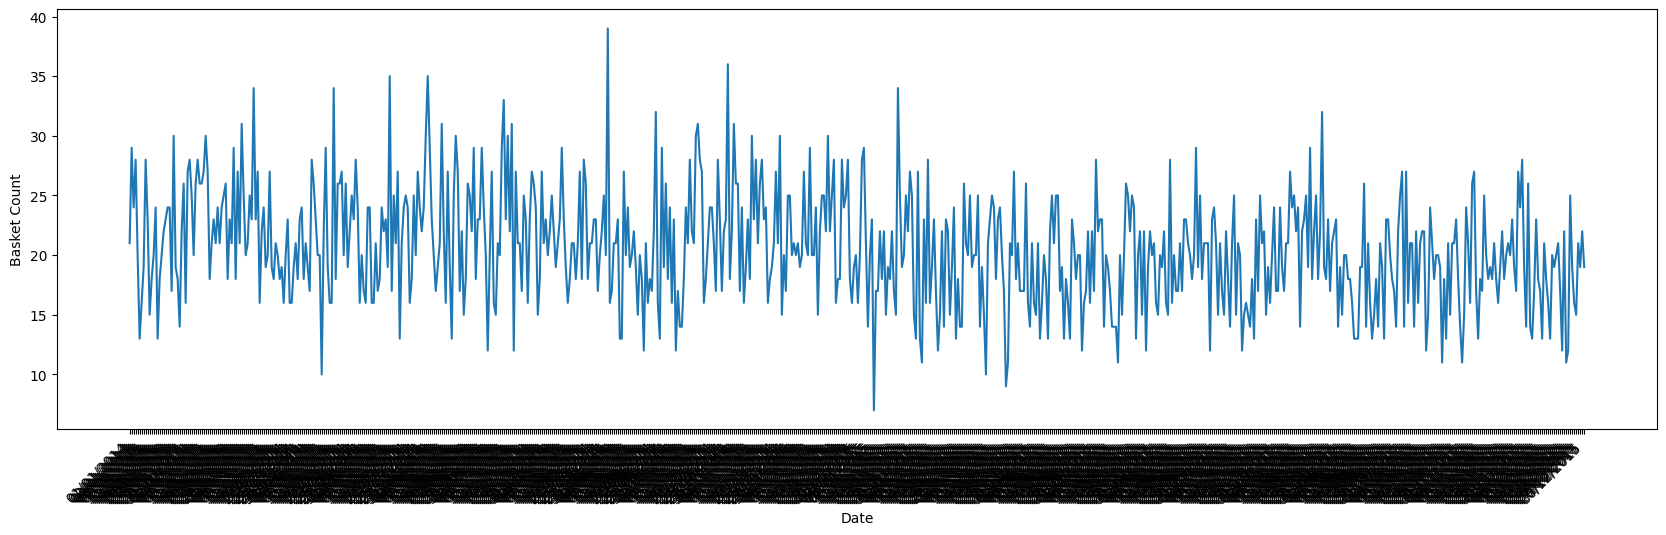

In [19]:
plt.figure(figsize=(20, 6))
plt.plot(plot_df['Date'], plot_df['basket_count'])
plt.xlabel('Date')
plt.ylabel('Basket Count')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.2)
plt.show()

In [20]:
!mkdir /basket

In [21]:
sort_df.select('basket').write.option('header', 'true').csv('/basket')